# Week13 Deep Learning and TensorFlow 2

# 1. Convolutional Neural Netowks

### Image Classification with CNNs

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Load and Preprocess the Fashion-MNIST Dataset 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0
num_classes = 10

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) # Expand dimension (Channel dim)
X_train.shape

(60000, 28, 28, 1)

In [4]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

In [5]:
y_train = y_train.reshape(y_train.shape[0], 1) 
y_train.shape

(60000, 1)

In [6]:
y_test = y_test.reshape(y_test.shape[0], 1) 
y_test.shape

(10000, 1)

In [7]:
y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

### Build the CNN model

In [8]:
layers = tf.keras.layers
base_model = tf.keras.models.Sequential([
    layers.Conv2D(32,kernel_size=(3,3),padding="same",
                 input_shape=(28,28,1),
                 activation="relu"),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D(pool_size=2),
    
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(10,activation="softmax")
])

base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,404,682
Trainable params: 1,404,682
Non-trainable params: 0
______________________________________________

In [13]:
base_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

### Train the model

In [14]:
base_history = base_model.fit(X_train,y_train,epochs=10,
                             validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.3508 - accuracy: 0.8746 - val_loss: 0.2712 - val_accuracy: 0.9010
Epoch 2/10
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.2165 - accuracy: 0.9186 - val_loss: 0.2392 - val_accuracy: 0.9142
Epoch 3/10
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.1650 - accuracy: 0.9387 - val_loss: 0.2172 - val_accuracy: 0.9236
Epoch 4/10
60000/60000 [==============================] - 68s 1ms/sample - loss: 0.1234 - accuracy: 0.9524 - val_loss: 0.2362 - val_accuracy: 0.9194
Epoch 5/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.0900 - accuracy: 0.9662 - val_loss: 0.2338 - val_accuracy: 0.9231
Epoch 6/10
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.0631 - accuracy: 0.9766 - val_loss: 0.2740 - val_accuracy: 0.9280
Epoch 7/10
60000/60000 [==============================] 

In [15]:
base_model.evaluate(X_train,y_train)

60000/60000 [==============================] - 15s 257us/sample - loss: 0.0214 - accuracy: 0.9927


[0.021353190942541306, 0.9927]

In [16]:
base_model.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 252us/sample - loss: 0.4206 - accuracy: 0.9215


[0.4206170190278441, 0.9215]

### The model with dropout regularization

In [17]:
# Dropout Model
dropout_model = tf.keras.models.Sequential([
    layers.Conv2D(32,kernel_size=(3,3),padding="same",
                 input_shape=(28,28,1),
                 activation="relu"),
    layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    layers.MaxPool2D(pool_size=2),
    
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10,activation="softmax")
])

dropout_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [18]:
drop_history = dropout_model.fit(X_train,y_train,epochs=10,
                             validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.4631 - accuracy: 0.8355 - val_loss: 0.3006 - val_accuracy: 0.8890
Epoch 2/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.3007 - accuracy: 0.8916 - val_loss: 0.2620 - val_accuracy: 0.9016
Epoch 3/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.2530 - accuracy: 0.9076 - val_loss: 0.2430 - val_accuracy: 0.9092
Epoch 4/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.2185 - accuracy: 0.9185 - val_loss: 0.2251 - val_accuracy: 0.9174
Epoch 5/10
60000/60000 [==============================] - 71s 1ms/sample - loss: 0.1919 - accuracy: 0.9301 - val_loss: 0.2359 - val_accuracy: 0.9194
Epoch 6/10
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.1677 - accuracy: 0.9374 - val_loss: 0.2364 - val_accuracy: 0.9207
Epoch 7/10
60000/60000 [==============================] 

In [19]:
dropout_model.evaluate(X_train,y_train)

60000/60000 [==============================] - 15s 252us/sample - loss: 0.0571 - accuracy: 0.9802


[0.057149712504725905, 0.9801667]

In [20]:
dropout_model.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 256us/sample - loss: 0.2345 - accuracy: 0.9252


[0.23450862225443125, 0.9252]

### Plotting the learning curve

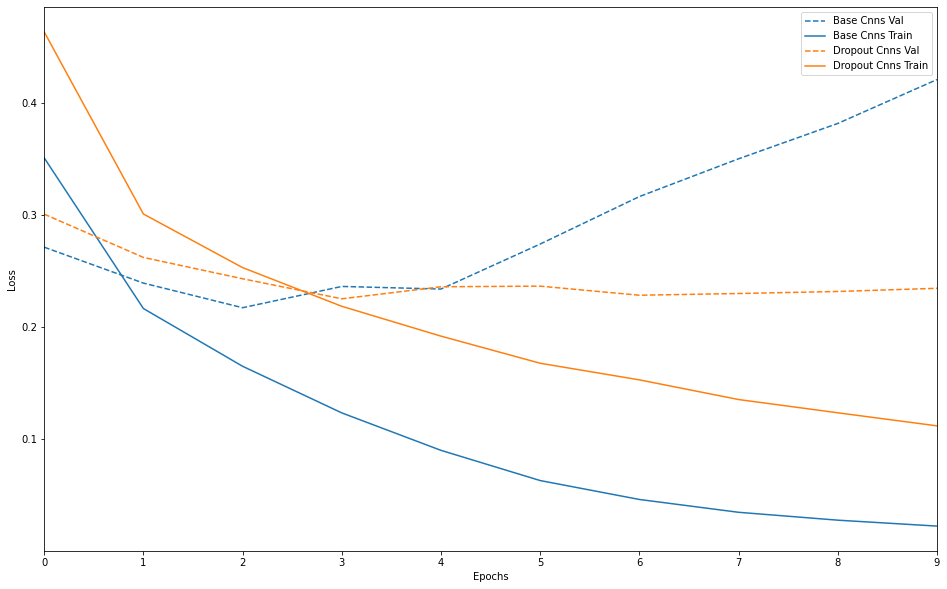

In [21]:
def plot_history(histories, key='loss'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])

plot_history([('Base CNNs', base_history),
              ('Dropout CNNs', drop_history)])

# 2. Recurrent Neural Networks

### Character-level Language Model with RNNs

In [22]:
import tensorflow as tf
import numpy as np
import os
import time

### Load and preprocess the Shakespeare dataset

**1. Download the Shakespeare's Sonnet dataset**

In [23]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt',
'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

# Load whole text file as a string, then decode.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

1122304/1115394 [==============================] - 0s 0us/step
Length of text: 1115394 characters


In [24]:
# We'll use the subset
text = text[:14592]
len(text)

14592

In [25]:
# Take a look first 250 characters
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [26]:
# The unique characters in the file
vocab = sorted(set(text))
print ('{} unique characters'.format(len(vocab)))

58 unique characters


**2. Vectorize the text**
- **text_as_int** : a vector with shape of (14592, ) 

In [27]:
# Creating a mapping from unique characters to indices, and vice versa
char2idx = {u:i for i,u in enumerate(vocab)}
idx2char = np.array(vocab)

# Convert the characters to the indices
text_as_int = np.array([char2idx[c] for c in text])

# Show how the first 13 characters from the text are mapped to integers
print ('{} ---- characters mapped to int ---- > {}'.format(repr(text[:13]), text_as_int[:13]))

'First Citizen' ---- characters mapped to int ---- > [15 40 49 50 51  1 12 40 51 40 57 36 45]


**3. Creating training task**
- **char_dataset** : `tf.data.Dataset` object, shape = (14592, )
   - .take(*count*) : Creates a `Dataset` with at most *count* elements from this dataset.
   - .batch(*count*) : Combines consecutive elements of this dataset into batches.

In [28]:
# The maximum length sentence we want for a single input in characters
seq_length = 100

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
    print(idx2char[i.numpy()])

F
i
r
s
t


In [29]:
# Check the shape : char_dataset
np.array(list(char_dataset.as_numpy_iterator())).shape

(14592,)

- **sequences** : `tf.data.Dataset` object, shape = (144, 101)
   - `.map(map_func)` : Maps `map_func` across the elements of this dataset.
- **dataset** : `tf.data.Dataset` object, shape = (144, 2, 100) 

In [30]:
# 'batch' method convert these individual characters to sequences of the desired size
sequences = char_dataset.batch(seq_length+1,drop_remainder=True)

for item in sequences.take(5):
    print(repr(''.join(idx2char[item.numpy()])))

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [31]:
# Check the shape : sequences
np.array(list(sequences.as_numpy_iterator())).shape

(144, 101)

In [32]:
# map_func
def split_input_target(chunk):
    # input text is shifted to form the target text 
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

# 'map' method lets us easily apply a simple function to each batch
dataset = sequences.map(split_input_target)

# Print the examples 
for input_ex, target_ex in  dataset.take(1):
    print ('Input : ', repr(''.join(idx2char[input_ex.numpy()])))
    print ('Target :', repr(''.join(idx2char[target_ex.numpy()])))

Input :  'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target : 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [33]:
# Check the shape : dataset - (1)
np.array(list(dataset.as_numpy_iterator())).shape

(144, 2, 100)

4. Create training batches
- **dataset** : `tf.data.Dataset` object, shape = (9, 2, 16, 100)

In [34]:
# Batch size
BATCH_SIZE = 16

# Buffer size to shuffle the dataset
BUFFER_SIZE = 100

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE,drop_remainder=True)

In [35]:
# Check the shape : dataset - (2)
np.array(list(dataset.as_numpy_iterator())).shape

(9, 2, 16, 100)

### Build the model

- 3 layers are used to define this model
    1. `tf.keras.layers.Embedding`: The input layer, A trainable lookup table that will map the numbers of each character to a vector with `embedding_dim` dimensions;
    2. `tf.keras.layers.RNN`: A RNN with size `units=rnn_units`
    3. `tf.keras.layers.Dense`: The output layer, with `vocab_size` outputs.

In [36]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 128

# Number of RNN units
rnn_units = 256

In [37]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    layers = tf.keras.layers
    model = tf.keras.Sequential([
        layers.Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim,
                        batch_input_shape=[batch_size,None]
                        ),
        layers.SimpleRNN(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'
                        ),
        layers.Dense(vocab_size)
    ])
    return model

In [38]:
# Build the model 
model = build_model(
  vocab_size = vocab_size,
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)

# Check the model architecture
# Model can be run on inputs of any length 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (16, None, 128)           7424      
_________________________________________________________________
simple_rnn (SimpleRNN)       (16, None, 256)           98560     
_________________________________________________________________
dense_4 (Dense)              (16, None, 58)            14906     
Total params: 120,890
Trainable params: 120,890
Non-trainable params: 0
_________________________________________________________________


### Try the model
Before training the model, take a look about how does the model works

In [39]:
# Check the shape of the input, output
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)

print(input_example_batch.shape)
print(target_example_batch.shape)
print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")


(16, 100)
(16, 100)
(16, 100, 58) # (batch_size, sequence_length, vocab_size)


In [40]:
# We need to sample from the output distribution, not to take the argmax of the distribution
sampled_indices = tf.random.categorical(example_batch_predictions[0],num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

# Predictions of the next character index 
sampled_indices

array([32, 44, 32,  8, 47, 26, 16, 38, 40, 41, 15,  5, 37, 22, 16, 56,  0,
       53,  0, 57, 26, 37, 24, 31, 32, 19,  2,  0, 32,  1, 36, 26, 27, 53,
        3, 13, 28, 25, 33, 28, 34,  7, 43, 38, 32, 15, 18, 56, 15,  0, 32,
       35,  7, 26, 21, 43, 53,  0, 16, 46, 17, 42,  1, 27,  3, 54, 21, 50,
       31, 56, 33, 54, 50, 47, 57, 11, 24, 24, 44, 30, 19, 45, 42, 18, 36,
       10, 49, 40, 45, 23, 32, 17,  1,  1,  9,  8, 24,  9, 27,  7],
      dtype=int64)

In [41]:
# Decode the predictions, the model shows poor performance 
print("Input: \n", repr("".join(idx2char[input_example_batch[0]])))
print()
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices ])))

Input: 
 "at us not up, they will; and\nthere's all the love they bear us.\n\nMENENIUS:\nEither you must\nConfess y"

Next Char Predictions: 
 "ama;pSGgijF-fNGy\nv\nzSfPYaJ!\na eSTv'DURbUc:lgaFIyF\nad:SMlv\nGoHk T'wMsYybwspzBPPmWJnkIeArinOaH  ?;P?T:"


### Train the model

In [42]:
# 1. Attach an optimizer, and a loss function
# define the loss function 
def loss(labels, logits):
    # Because the output of model is logit, 
    return tf.keras.losses.sparse_categorical_crossentropy(labels,logits,from_logits=True)

example_batch_loss=loss(target_example_batch,example_batch_predictions)
print("Prediction shape: ",example_batch_predictions.shape,"# (batch_size, sequence_length, vocab_size)")
print("scalar_loss: ",example_batch_loss.numpy().mean())


# Configure the training procedure
model.compile(optimizer='adam',loss=loss)

Prediction shape:  (16, 100, 58) # (batch_size, sequence_length, vocab_size)
scalar_loss:  4.075044


In [43]:
# 2. Configure the checkpoints
# `tf.keras.callbacks.ModelCheckpoint` : The callback function to save the model checkpoint

# Directory where the model weights will be saved
ckpt_dir = './training_rnns_ckpts'

# Checkpoint name
ckpt_prefix = os.path.join(ckpt_dir, "ckpt_rnns_{epoch}")

# Callback function to save the model weights
ckpt_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=ckpt_prefix,
    save_weights_only=True)

In [44]:
# 3. Execute the training
EPOCHS=10
rnn_history = model.fit(dataset,epochs=EPOCHS,callbacks=[ckpt_callback])

Train for 9 steps
Epoch 1/10
9/9 [==============================] - 1s 143ms/step - loss: 3.7186
Epoch 2/10
9/9 [==============================] - 0s 42ms/step - loss: 3.2712
Epoch 3/10
9/9 [==============================] - 0s 38ms/step - loss: 3.2065
Epoch 4/10
9/9 [==============================] - 0s 42ms/step - loss: 3.1447
Epoch 5/10
9/9 [==============================] - 0s 47ms/step - loss: 3.0417
Epoch 6/10
9/9 [==============================] - 0s 39ms/step - loss: 2.9064
Epoch 7/10
9/9 [==============================] - 0s 38ms/step - loss: 2.7649
Epoch 8/10
9/9 [==============================] - 0s 40ms/step - loss: 2.6197
Epoch 9/10
9/9 [==============================] - 0s 37ms/step - loss: 2.5032
Epoch 10/10
9/9 [==============================] - 0s 42ms/step - loss: 2.4108


### Generate text

In [45]:
# Check the latest checkpoint
tf.train.latest_checkpoint(ckpt_dir)

'./training_rnns_ckpts\\ckpt_rnns_10'

In [46]:
# To run the model with one sample(not with batch_size of samples),
# We rebuild the model, and load the weights from the saved checkpoint. 
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(ckpt_dir))

In [47]:
# Check the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (1, None, 128)            7424      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (1, None, 256)            98560     
_________________________________________________________________
dense_5 (Dense)              (1, None, 58)             14906     
Total params: 120,890
Trainable params: 120,890
Non-trainable params: 0
_________________________________________________________________


In [48]:
# The prediction loop
def generate_text(model, start_string):
    # Number of characters to generate
    n_generate = 1000

    # Converting start_strings to index (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    
    # Making the empty list to store results
    text_generated = []

    # Here batch size == 1
    model.reset_states()
    for i in range(n_generate):
        predictions = model(input_eval)
        
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the character
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        # Passing the predicted character as the next input to the model along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [49]:
# Generate text from start string
print(generate_text(model, start_string="All: "))

All: WircoG
MEMFUS!
NADm ate ine h:rafeiu. wot sntonlhey iraks ovind mab to.l theVls wer, Bocithe pooTyarsny onmitEtreg pheylrhbafsy
piferes hedee theirey therlves arouvsroin dimersns
:
aus toame siotswy,
uns aluy apriral: gir in oap.
SIncos t eoons aaptyet mocol gime onr ys hemisvsth tetsad ba, we fot rousganiwnn

node de est aht
wer to soy.
TPs pald chetr y!ashit Sorhase mourt
tureus iret ye opeoroas uad sf ours srbeade
t rs
and, the
s!
mithe?
'he.
:MYwi,stCot Hid wenor cet- read they osom:.ogBHbi s iny ot tare tnoucWeaThevir thanles feved lo ne ond ce
thein wongest w; paremesthak,
suscessgntus nte saas et pdsubg wenc,
oures far desd yoor hn is encacotg
noukiTar nis'r, insthe g. yl faml then Went baYearis anThelnr the kout Bese bine poanlle yf'd toly ygu nBen no th,:gWiRdtfme tes and .otTes b
ue me gone hid ourenlon

Herc-ngCiutI.
TSubu Is ar Bomer; yhWtlsbsili,a,f-Yor oul the dnstgd tedylkEt
C. cousd hioreslMesoNpat. Thou
d,
ThetdMCfers nass,

orlisy Cams! he -ath yos:
Io
xolFhIatfi

# Text Classifiation with RNNs 

### Import TensorFlow and other libraries

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt

### Load and preprocess the IMDb dataset

In [2]:
# using tfds library, load the imdb dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling...:   0%|          | 0/10 [00:00<?, ? shard/s]

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling...:   0%|          | 0/10 [00:00<?, ? shard/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling...:   0%|          | 0/20 [00:00<?, ? shard/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Reading...: 0 examples [00:00, ? examples/s]

Writing...:   0%|          | 0/2500 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to C:\Users\Baek\tensorflow_datasets\imdb_reviews\subwords8k\0.1.0. Subsequent calls will reuse this data.


In [3]:
# info object has the lookup table(encoder) of token and index
encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [4]:
# Test the encoder
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [5]:
# Test the encoder
for index in encoded_string:
    print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [14]:
# Creating training task
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)#오류 이유를 잘 모르겠습니다.

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

TypeError: padded_batch() missing 1 required positional argument: 'padded_shapes'

In [ ]:
# Check the shape of batches
for x, y in train_dataset.take(2):
    print(x)
    print(y)
    print("-"*90)

### Build the model

In [ ]:
layers = tf.keras.layers
model = tf.keras.Sequential([
    layers.Embedding(encoder.vocab_size, 64),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
model.summary()

### Train the model

In [ ]:
history = model.fit(train_dataset, epochs=5,
                    validation_data=test_dataset, 
                    validation_steps=30)

### Evalutate the model

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

In [ ]:
# helper function 
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
def sample_pred(text, model):
    encoded_text = encoder.encode(text)
    encoded_text = tf.cast(encoded_text, tf.float32)
    predictions = model.predict(tf.expand_dims(encoded_text, 0))
    prob = tf.sigmoid(predictions)[0][0].numpy()
    print('Prob : ', prob)
    if prob >= 0.5:
        return "Positive"
    else:
        return "Negative"

In [ ]:
sample_pred_text = 'You should watch this movie, this movie is excellent'
sample_pred(sample_pred_text, model)

# Quiz 1 : Image Classification Model on the CIFAR-10
- Build the Convolutional Neural Networks
    - Build the model following the bellow model summary
    - Apply the dropout regularization to the model and compare the result
- Compare the performance of the model built last week


### Import TensorFlow and other libraries

In [0]:
import tensorflow as tf

from tensorflow.keras import datasets, models
import matplotlib.pyplot as plt

### Load the CIFAR-10 Dataset

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Build the model

In [0]:
layers = tf.keras.layers

cifar_model = None


In [0]:
cifar_model.summary()

In [0]:
# Compile the model(set optimizer, loss function and metrics)
None

### Train the model

In [0]:
cifar_history = None

### Apply the dropout to the model

In [0]:
cifar_drop_model = None

In [0]:
cifar_drop_model.summary()

In [0]:
# Compile the model(set optimizer, loss function and metrics)
None

In [0]:
cifar_drop_history = None

In [0]:
def plot_history(histories, key='loss'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])

plot_history([('Base CNNs', cifar_history),
              ('Dropout CNNs', cifar_drop_history)])

In [0]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])

plot_history([('Base CNNs', cifar_history),
              ('Dropout CNNs', cifar_drop_history)])

# Quiz 2 : Character-level Language Model
- Build the Character-level Language Model with LSTM
- Compare the generated text to the one generated by RNNs


### Character-level Language Model with RNNs

In [0]:
import tensorflow as tf
import numpy as np
import os
import time

### Load and preprocess the Shakespeare dataset

**1. Download the Shakespeare's Sonnet dataset**

In [0]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt',
'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

# Load whole text file as a string, then decode.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

In [0]:
# We'll use the subset
text = text[:14592]
len(text)

In [0]:
# Take a look first 250 characters
print(text[:250])

In [0]:
# The unique characters in the file
vocab = None
print ('{} unique characters'.format(len(vocab)))

**2. Vectorize the text**
- **text_as_int** : a vector with shape of (14592, ) 

In [0]:
# Creating a mapping from unique characters to indices, and vice versa
char2idx = None
idx2char = None

# Convert the characters to the indices
text_as_int = None

# Show how the first 13 characters from the text are mapped to integers
print ('{} ---- characters mapped to int ---- > {}'.format(repr(text[:13]), text_as_int[:13]))

**3. Creating training task**
- **char_dataset** : `tf.data.Dataset` object, shape = (14592, )
   - .take(*count*) : Creates a `Dataset` with at most *count* elements from this dataset.
   - .batch(*count*) : Combines consecutive elements of this dataset into batches.

In [0]:
# The maximum length sentence we want for a single input in characters
seq_length = 100

# Create training examples / targets
char_dataset = None

for i in char_dataset.take(5):
  print(idx2char[i.numpy()])

In [0]:
# Check the shape : char_dataset
np.array(list(char_dataset.as_numpy_iterator())).shape

- **sequences** : `tf.data.Dataset` object, shape = (144, 101)
   - `.map(map_func)` : Maps `map_func` across the elements of this dataset.
- **dataset** : `tf.data.Dataset` object, shape = (144, 2, 100) 

In [0]:
# 'batch' method convert these individual characters to sequences of the desired size
sequences = None

for item in sequences.take(5):
  print(repr(''.join(idx2char[item.numpy()])))

In [0]:
# Check the shape : sequences
np.array(list(sequences.as_numpy_iterator())).shape

In [0]:
# map_func
def split_input_target(chunk):
    # input text is shifted to form the target text 
    input_text = None
    target_text = None
    return input_text, target_text

# 'map' method lets us easily apply a simple function to each batch
dataset = None

# Print the examples 
for input_ex, target_ex in  dataset.take(1):
    print ('Input : ', repr(''.join(idx2char[input_ex.numpy()])))
    print ('Target :', repr(''.join(idx2char[target_ex.numpy()])))

In [0]:
# Check the shape : dataset - (1)
np.array(list(dataset.as_numpy_iterator())).shape

4. Create training batches
- **dataset** : `tf.data.Dataset` object, shape = (9, 2, 16, 100)

In [0]:
# Batch size
BATCH_SIZE = 16

# Buffer size to shuffle the dataset
BUFFER_SIZE = 100

dataset = None

In [0]:
# Check the shape : dataset - (2)
np.array(list(dataset.as_numpy_iterator())).shape

### Build the model

- 3 layers are used to define this model
    1. `tf.keras.layers.Embedding`: The input layer, A trainable lookup table that will map the numbers of each character to a vector with `embedding_dim` dimensions;
    2. `tf.keras.layers.RNN`: A RNN with size `units=rnn_units`
    3. `tf.keras.layers.Dense`: The output layer, with `vocab_size` outputs.

In [0]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 128

# Number of RNN units
rnn_units = 256

In [0]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    layers = tf.keras.layers
    model = None
    return model

In [0]:
# Build the model 
model = build_model(
  vocab_size = vocab_size,
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)

# Check the model architecture
# Model can be run on inputs of any length 
model.summary()

### Try the model
Before training the model, take a look about how does the model works

In [0]:
# Check the shape of the input, output
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = None

print(input_example_batch.shape)
print(target_example_batch.shape)
print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")


In [0]:
# We need to sample from the output distribution, not to take the argmax of the distribution
sampled_indices = None
sampled_indices = None

# Predictions of the next character index 
sampled_indices

In [0]:
# Decode the predictions, the model shows poor performance 
print("Input: \n", repr("".join(idx2char[input_example_batch[0]])))
print()
print("Next Char Predictions: \n", repr("".join(idx2char[sampled_indices ])))

### Train the model

In [0]:
# 1. Attach an optimizer, and a loss function
# define the loss function 
def loss(labels, logits):
    # Because the output of model is logit, 
    return None

# Configure the training procedure
optimizer = None

None

In [0]:
# 2. Configure the checkpoints
# `tf.keras.callbacks.ModelCheckpoint` : The callback function to save the model checkpoint

# Directory where the model weights will be saved
ckpt_dir = './training_lstm_ckpts'

# Checkpoint name
ckpt_prefix = os.path.join(ckpt_dir, "ckpt_lstm_{epoch}")

# Callback function to save the model weights
ckpt_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=ckpt_prefix,
    save_weights_only=True)

In [0]:
# 3. Execute the training
EPOCHS=10
rnn_history = None

### Generate text

In [0]:
# Check the latest checkpoint
tf.train.latest_checkpoint(ckpt_dir)

In [0]:
# To run the model with one sample(not with batch_size of samples),
# We rebuild the model, and load the weights from the saved checkpoint. 
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(ckpt_dir))

In [0]:
# Check the model summary
model.summary()

In [0]:
# The prediction loop
def generate_text(model, start_string):
    # Number of characters to generate
    n_generate = 1000

    # Converting start_strings to index (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    
    # Making the empty list to store results
    text_generated = []

    # Here batch size == 1
    model.reset_states()
    for i in range(n_generate):
        predictions = model(input_eval)
        
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the character
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        # Passing the predicted character as the next input to the model along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [0]:
# Generate text from start string
print(generate_text(model, start_string="All: "))

In [0]:
# The prediction loop
def generate_text(model, start_string):
    # Number of characters to generate
    n_generate = 1000

    # Converting start_strings to index (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    
    # Making the empty list to store results
    text_generated = []

    # Here batch size == 1
    model.reset_states()
    for i in range(n_generate):
        predictions = model(input_eval)
        
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the character
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        # Passing the predicted character as the next input to the model along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [0]:
# Generate text from start string
print(generate_text(model, start_string="All: "))

In [0]:
# 2. Configure the checkpoints
# `tf.keras.callbacks.ModelCheckpoint` : The callback function to save the model checkpoint

# Directory where the model weights will be saved
ckpt_dir = './training_lstm_ckpts'

# Checkpoint name
ckpt_prefix = os.path.join(ckpt_dir, "ckpt_lstm_{epoch}")

# Callback function to save the model weights
ckpt_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=ckpt_prefix,
    save_weights_only=True)